# Vue 05 Component State Flow

## Passing Props

### Props

#### 동일한 데이터, 하지만 다른 컴포넌트 
- 동일한 사진 데이터가 한 화면에 다양한 위치에서 여러 번 출력되고 있음

- 하지만 해당 페이지를 구성하는 컴포넌트가 여러 개라면 각 컴포넌트가 `개별적으로 동일한 데이터를 관리`해야 할까? 
- 그렇다면 `사진을 변경` 해야 할 때 모든 컴포넌트에 대해 변경 요청을 해야 함 
- > “`공통된 부모 컴포넌트에서 관리하자`"

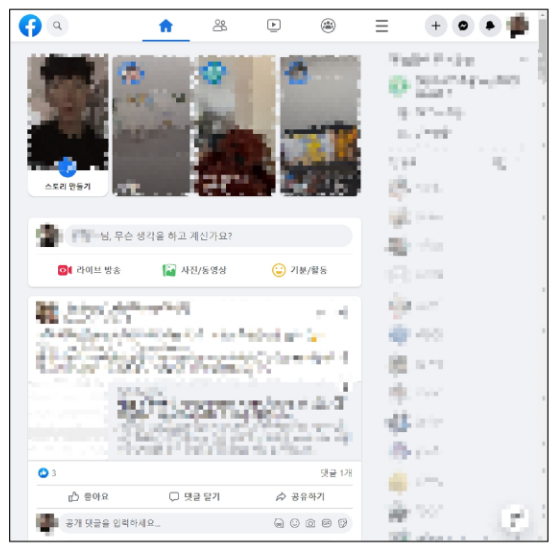

#### 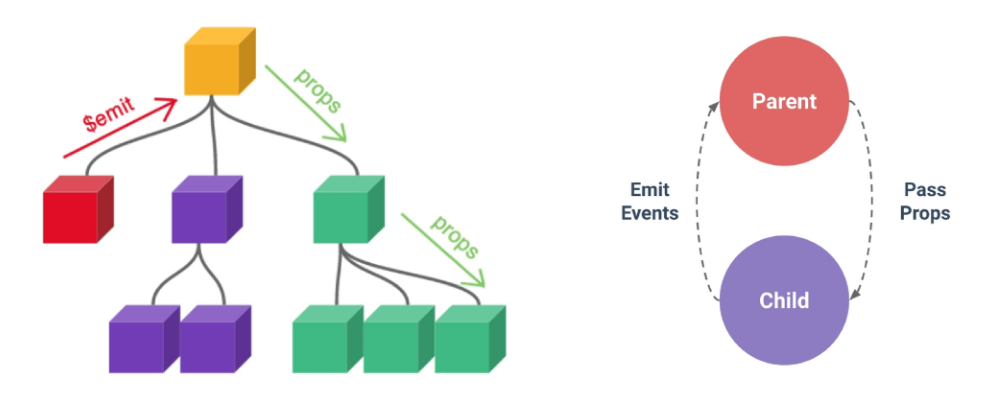

부모는 자식에게 데이터를 전달(`Pass Props`)하며, 자식은 자신에게 일어난 일을 부모에게 알림(`Emit event`)

#### Props 
부모 컴포넌트로부터 자식 컴포넌트로 데이터를 전달하는데 사용되는 속성

#### Props 특징 
- 부모 속성이 업데이트되면 `자식으로 전달` 되지만 그 `반대는 안됨`

- 즉, 자식 컴포넌트 내부에서 props를 변경하려고 시도해서는 안되며 불가능 
- 또한 부모 컴포넌트가 업데이트될 때마다 이를 사용하는 자식 컴포넌트의 모든 props가 최신 값으로 업데이트 됨 
- > 부모 컴포넌트에서만 변경하고 이를 내려 받는 자식 컴포넌트는 자연스럽게 갱신

#### One-Way Data Flow 
모든 props는 자식 속성과 부모 속성 사이에 `하향식 단방향 바인딩`을 형성 (one-way-down binding)

#### 단방향인 이유 
하위 컴포넌트가 실수로 상위 컴포넌트의 상태를 변경하여 앱에서의 데이터 흐름을 이해하기 어렵게 만드는 것을 방지하기 위함 

- > 데이터 흐름의 “`일관성`” 및 “`단순화`"

### Props 선언

####  사전 준비
1. vue 프로젝트 생성 Passing Props

2. 초기 생성된 컴포넌트 모두 삭제 (App. vue 제외) 
3. src/assets 내부 파일 모두 삭제 
4. main.js 해당 코드 삭제 
```js
// main.js 

import './assets/main.css' 
```
5. App > Parent > ParentChild 컴포넌트 관계 작성

- App 컴포넌트 작성 
```html
<!-- App.vue --> 
 <template> 
    <div>
        <Parent /> 
    </div> 
</template> 

<script setup> 
import Parent from '@/components/Parent.vue' 
</script>
```
```html
- Parent 컴포넌트 작성 
<!-- Parent.vue -->

<template> 
    <div> 
        <ParentChild /> 
    </div> 
</template> 

<script setup> 
import ParentChild from '@/components/ParentChild.vue' 
</script>
```
- ParentChild 컴포넌트 작성 
```html
<!-- ParentChild.vue -->
<template> 
    <div></div> 
</template> 

<script setup> 
</script>
```

#### Props 선언 
부모 컴포넌트에서 내려 보낸 props를 사용하기 위해서는 자식 컴포넌트에서 명시적인 props 선언이 필요

#### Props 작성 
부모 컴포넌트 Parent에서 자식 컴포넌트 ParentChild에 보낼 props 작성

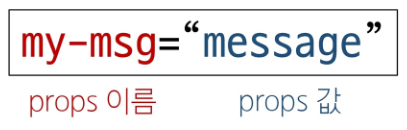
```html
<!-- Parent.vue -->
 <template> 
    <div> 
        <ParentChild my-msg="message" />  <===
    </div> 
</template>

#### Props 선언 
- defineProps()를 사용하여 props를 선언

- defineProps()에 작성하는 인자의 데이터 타입에 따라 선언 방식이 나뉨
```html
<script setup> 
defineProps() 
</script>
```

#### Props 선언 2가지 방식 
1. “문자열 배열"을 사용한 선언 

2. “객체"를 사용한 선언

##### 1. 문자열 배열을 사용한 선언 
- 배열의 문자열 요소로 props 선언 

- 문자열 요소의 이름은 전달된 props의 이름 
```html
<!-- ParentChild.vue -->

<script setup> 
defineProps(['myMsg'])
</script>
```

#### 2. 객체를 사용한 선언 
- 각 객체 속성의 키가 전달받은 props 이름이 되며, 객체 속성의 값은 값이 될 데이터의 타입에 해당하는 생성자 함수(Number, String...)여야 함

- `객체 선언 문법 사용 권장` 
```html
<!-- ParentChild.vue --> 
 
 <script setup> 
 defineProps({ 
    myMsg: String
}) 
</script>
```

#### props 데이터 사용
- props 선언 후 템플릿에서 반응형 변수와 같은 방식으로 활용 
```html
<!-- ParentChild.vue --> 
 <div> 
    <p>{{ myMsg }}</p> 
</div> 
```

- props를 객체로 반환하므로 필요한 경우 JavaScript에서 접근 가능 
```html
<script setup> 
const props = defineProps({ myMsg: String }) 
console.log(props) // {myMsg: 'message'} 
console.log(props.myMsg) // 'message' 
</script>
```

- props 출력 결과 확인

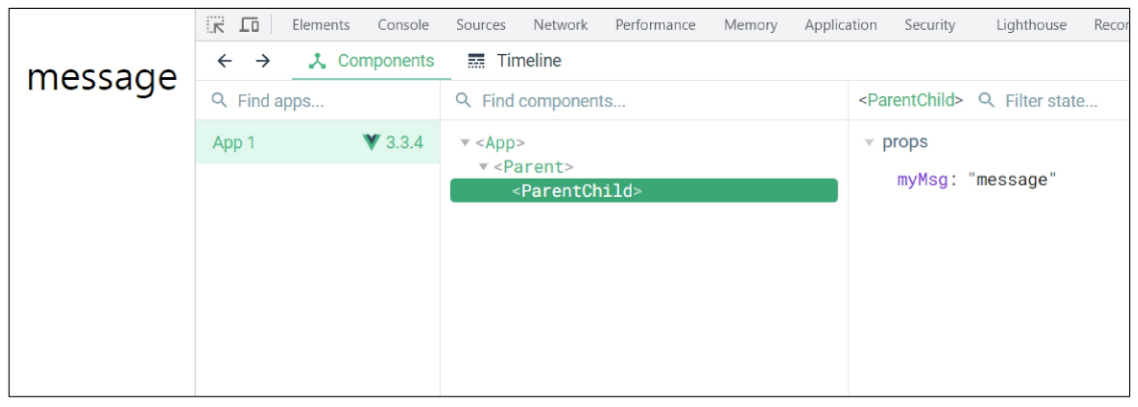

#### 한 단계 더 props 내려 보내기 
- ParentChild 컴포넌트를 부모로 갖는 ParentGrandChild 컴포넌트 생성 및 등록
```html
<!-- ParentGrandChild.vue --> 

 <template> 
    <div></div> 
</template> 
<script setup> 
</script>

<!-- ParentChild.vue -->

<template>
    <div> 
        <p>{{ myMsg }}</p> 
        <ParentGrandChild /> 
    </div> 
</template> 

<script setup> 
import ParentGrandChild from '@/components/ParentGrandChild.vue' 

defineProps({ 
    myMsg: String, 
}) 
</script>
```

- ParentChild 컴포넌트에서 Parent로 부터 받은 props인 myMsg를 ParentGrandChild에게 전달
```html
<!-- ParentChild.vue -->

<template> 
    <div> 
        <p>{{ myMsg }}</p> 
        <!-- v-bind를 사용한 동적 props (이어지는 챕터에서 진행) -->
        <ParentGrandChild :my-msg="myMsg"/>  <==
    </div> 
</template>

<!-- ParentGrandChild.vue -->

<template> 
    <div> 
        <p>{{ myMsg }}</p> <==
    </div> 
</template> 

<script setup> 
defineProps({           <==
    myMsg: String,      <==
})                      <==
</script>
```

- 출력 결과 확인

- arentGrandChild가 받아서 출력하는 props은 Parent에 정의 되어있는 props이며 Parent가 props을 변경할 경우 이를 전달받고 있는 ParentChild, ParentGrandChild에서도 모두 업데이트 됨

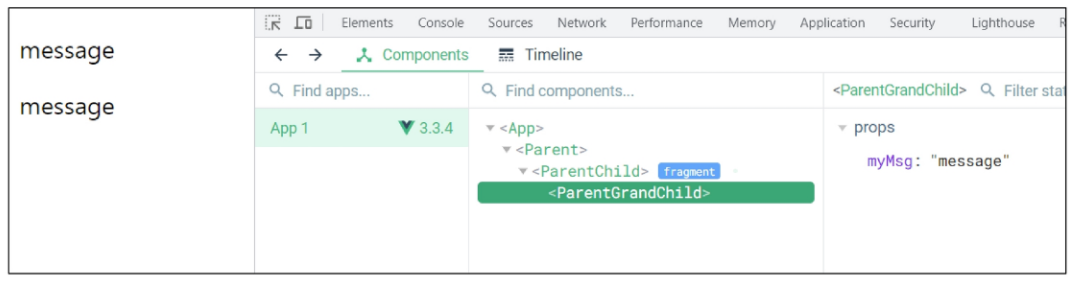

### Props 세부사항

#### Props 세부사항 
1. Props Name Casing (Props 이름 컨벤션) 

2. Static Props 와 Dynamic Props

#### 1. Props Name Casing 
- 자식 컴포넌트로 전달 시 (→ kebab-case) 
```html
<ParentChild my-msg="message" />
``` 
- `기술적으로 camelCase도 가능하나 HTML 속성 표기법과 동일하게 kebab-case로 표기할 것을 권장` 

- 선언 및 템플릿 참조 시 (→ camelCase) 
```js
defineProps({ 
    myMsg: String 
    }) 

<p>{{ myMsg }}</p>
```


#### 2. Static props & Dynamic props
- 지금까지 작성한 것은 Static(정적) 

- props v-bind를 사용하여 `동적으로 할당된 props`를 사용할 수 있음

1. Dynamic props 정의 
```html 
<!-- Parent.vue -->
```
```js
import { ref } from 'vue' 
const name = ref('Alice') 
```
```html
<!-- Parent.vue -->
 
<ParentChild my-msg="message": dynamic-props="name" />
```

2. Dynamic props 선언 및 출력 
```html
<!-- ParentChild.vue -->
```
```js
defineProps({ 
    myMsg: String, 
    dynamicProps: String, 
}) 
```
```html
<!-- ParentChild.vue -->

<p>{{ dynamicProps }}</p>
```

3. Dynamic props 출력 확인

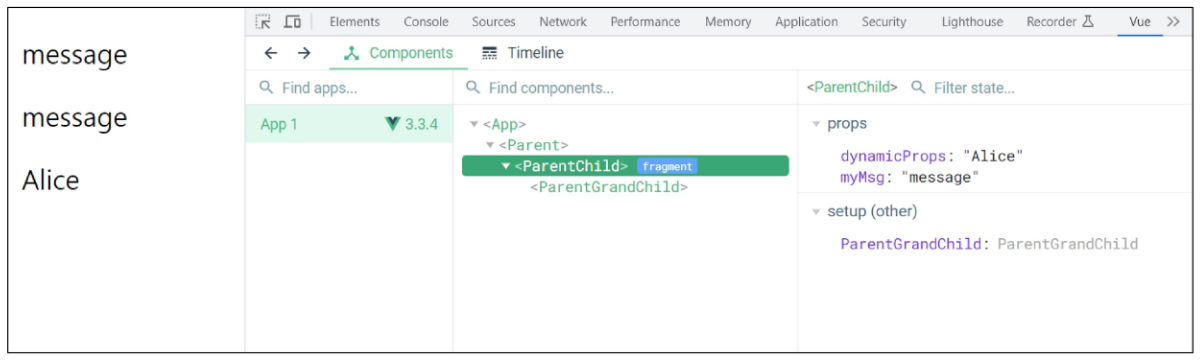

### Props 활용

#### 다른 디렉티브와 함께 사용 
- v-for와 함께 사용하여 반복되는 요소를 props로 전달하기

- ParentItem 컴포넌트 생성 및 Parent의 하위 컴포넌트로 등록
```html
<!-- ParentItem.vue -->
 
<template> 
    <div></div> 
</template> 

<script setup> 
</script>

<!-- Parent.vue --> 

<template> 
    <div> 
        <ParentItem /> 
    </div> 
</template> 

<script setup> 
import ParentItem from '@/components/ParentItem.vue' 
</script>
```
- 데이터 정의 및 v-for 디렉티브의 반복 요소로 활용 

- 각 반복 요소를 props로 내려 보내기 
```html
<!-- Parent.vue --> 
```
```js
const items = ref([ 
    { id: 1, name: '사과'}, 
    { id: 2, name: '바나나'}, 
    { id: 3, name: '딸기' }
]) 
```
```html
<!-- Parent.vue -->

<ParentItem 
    v-for="item in items" 
    :key="item.id" 
    :my-prop="item"
/>
```
- props 선언 및 출력 결과 확인 
```html
<!-- ParentItem.vue --> 
 
<template> 
    <div> 
        <p>{{ myProp.id }}</p> 
        <p>{{ myProp.name }}</p> 
    </div> 
</template> 

<script setup> 
defineProps({ 
    myProp: Object 
})
</script>
```
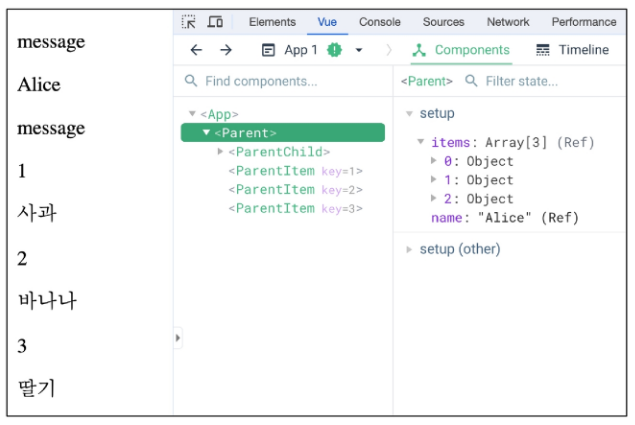

## Component Events

### Emit

#### 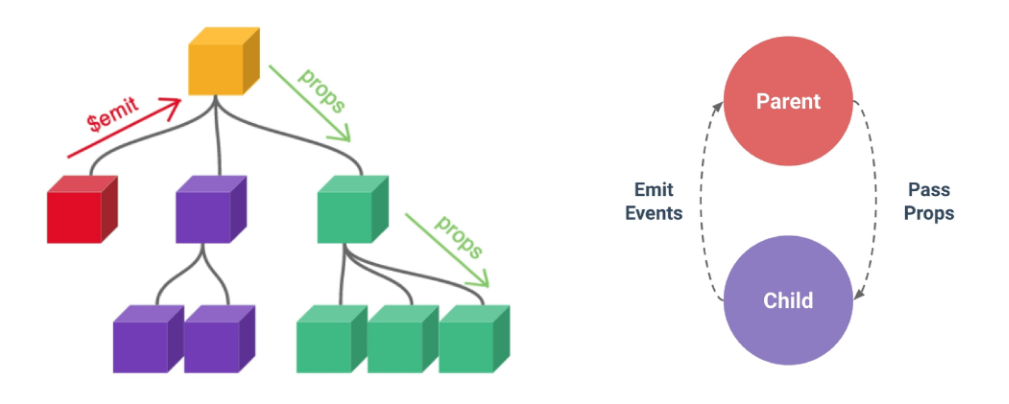
부모는 자식에게 데이터를 전달(Pass Props)하며, 자식은 자신에게 일어난 일을 부모에게 알림(Emit event) 
- > `부모가 props 데이터를 변경하도록 소리쳐야 한다.`

#### $emit() ($event)
자식 컴포넌트가 이벤트를 발생시켜 부모 컴포넌트로 데이터를 전달하는 역할의 메서드 

- `'$' 표기는 Vue 인스턴스의 내부 변수들을 가리킴` 

- `Life cycle hooks, 인스턴스 메서드 등 내부 특정 속성에 접근할 때 사용`

#### emit 메서드 구조 
```js
$emit(event, ...args) (... : 가변)
```
- event 
    - 커스텀 이벤트 이름 

- args 
    - 추가 인자

### 이벤트 발신 및 수신

#### 이벤트 발신 및 수신 (Emitting and Listening to Events) 
- $emit을 사용하여 템플릿 표현식에서 직접 사용자 정의 이벤트를 발신 
```html
<button @click="$emit('someEvent')">클릭</button>
```
`$emit('someEvent') -> @some-event`
- 그런 다음 부모는 v-on을 사용하여 수신할 수 있음 
```js
<ParentComp @some-event="someCallback" />
```

#### 이벤트 발신 및 수신하기
- ParentChild에서 someEvent라는 이름의 사용자 정의 이벤트를 발신 
```html
<!-- ParentChild.vue -->
<button @click="$emit('someEvent')">클릭</button>
```

- ParentChild의 부모 Parent는 v-on을 사용하여 발신된 이벤트를 수신 

- 수신 후 처리할 로직 및 콜백함수 호출 
```html
<!-- Parent.vue --> 
             ↓                        ↓ 
<ParentChild @some-event="someCallback" my-msg="message": dynamic-props="name" />

<!-- Parent.vue --> 
```
```js
const someCallback = function () { 
    console.log('ParentChild가 발신한 이벤트를 수신했어요.') 
}
```
- 이벤트 수신 결과

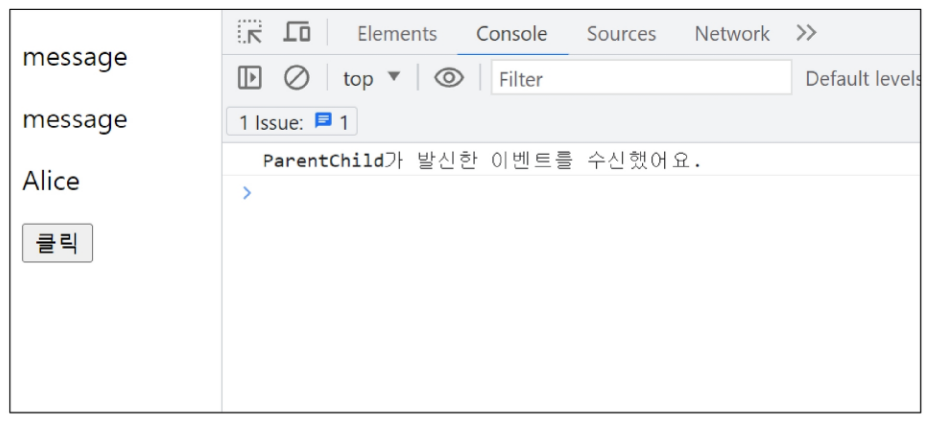

### emit 이벤트 선언

#### emit 이벤트 선언
- defineEmits()를 사용하여 발신할 이벤트를 선언 

- props와 마찬가지로 defineEmits()에 작성하는 인자의 데이터 타입에 따라 선언 방식이 나뉨 (배열, 객체) 
- defineEmits()는 $emit 대신 사용할 수 있는 동등한 함수를 반환 (script에서는 $emit 메서드를 접근할 수 없기 때문)

```html
<script setup> 
defineEmits() 
</script>

<script setup> 
const emit defineEmits(['someEvent', 'myFocus']) 

const buttonClick = function () { 
    emit('someEvent') 
} 
</script>
```

#### 이벤트 선언 활용 
이벤트 선언 방식으로 추가 버튼 작성 및 결과 확인 

```html
<!-- ParentChild.vue --> 
 
 <script setup> 
 const emit = defineEmits(['someEvent']) 
 
 const buttonClick = function () { 
    emit('someEvent') 
} 
</script> 

<!-- ParentChild.vue -->
 
<button @click="buttonClick">클릭</button>
```

### 이벤트 전달

#### 이벤트 인자 (Event Arguments) 
이벤트 발신 시 추가 인자를 전달하여 값을 제공할 수 있음

#### 이벤트 인자 전달 활용
- ParentChild에서 이벤트를 발신하여 Parent로 추가 인자 전달하기 
```html
<!-- ParentChild.vue --> 
```
```js
const emit = defineEmits(['someEvent', 'emitArgs']) 

const emitArgs = function () { 
    emit('emitArgs', 1, 2, 3) 
} 
```
```html
<!-- ParentChild.vue -->

<button @click="emitArgs">추가 인자 전달</button>
```

- ParentChild에서 발신한 이벤트를 Parent에서 수신 
```html
<!-- Parent.vue --> 

<ParentChild  
    @some-event="someCallback" 
    @emit-args="getNumbers" 
    my-msg="message" 
    :dynamic-props="name" 
/>

<!-- Parent.vue --> 
```
```js
const getNumbers = function (...args) { 
    console.log(args) 
    console.log(`ParentChild가 전달한 추가인자 ${args]를 수신했어요.`) 
}
```
- 추가 인자 전달 확인

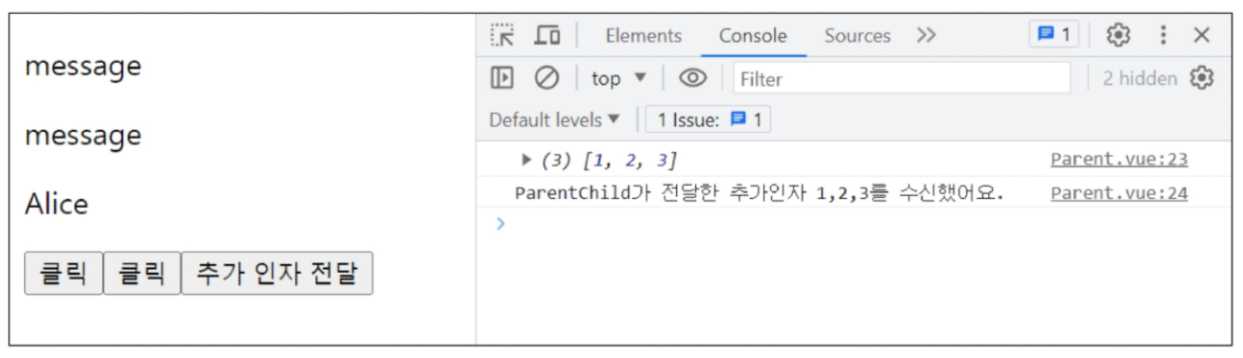

### 이벤트 세부사항

#### Event Name Casing 
- 선언 및 발신 시 (→ camelCase) 
```js
<button @click="$emit('someEvent')">클릭</button>

const emit = defineEmits(['someEvent']) 

emit('someEvent') 
```
- 부모 컴포넌트에서 수신 시 (→ kebab-case) 
```js
<ParentChild @some-event="..." />
```

### emit 이벤트 활용

#### emit 이벤트 실습 
최하단 컴포넌트 ParentGrandChild에서 Parent 컴포넌트의 name 변수 변경 요청하기

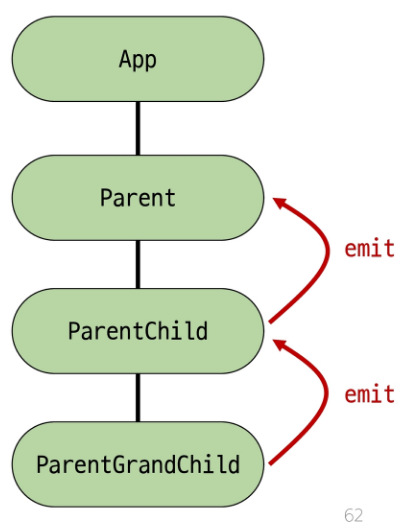

#### emit 이벤트 실습 구현
- ParentGrandChild에서 이름 변경을 요청하는 이벤트 발신
```html
<!-- ParentGrandChild.vue -->
```
```js
const emit defineEmits(('updateName']) 

const updateName = function () { 
    emit('updateName')
} 
```
```html
<!-- ParentGrandChild.vue -->

<button @click="updateName">이름 변경</button>
```
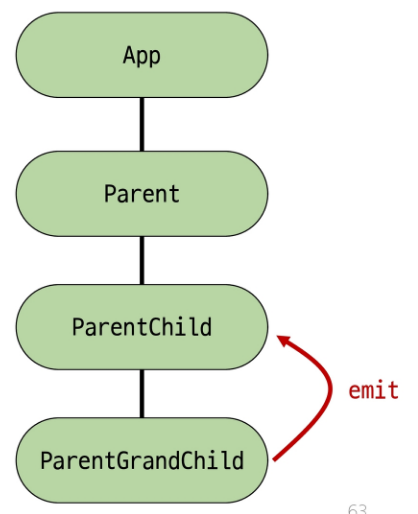

- 이벤트 수신 후 이름 변경을 요청하는 이벤트 발신
```html
<!-- ParentChild.vue --> 
```
```js                                              
const emit = defineEmits(['someEvent', 'emitArgs', 'updateName']) 
                                                   ↑          ↑
const updateName = function () {        <=
    emit('updateName')                  <=
}                                       <=
```
```html
<!-- ParentChild.vue --> 
```
```js                             ↓                       ↓
<ParentGrandChild :my-msg="myMsg" @update-name="updateName" />
```                    
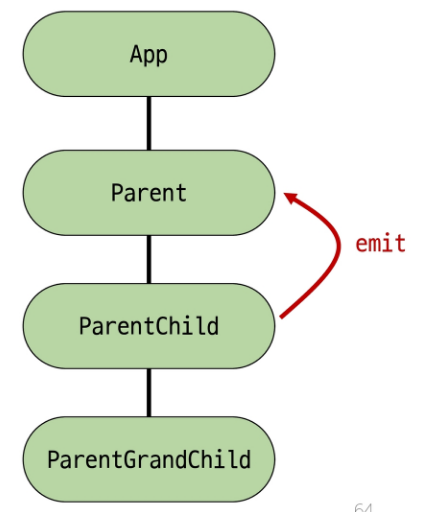           

- 이벤트 수신 후 이름 변수 변경 메서드 호출 

- 해당 변수를 props으로 받는 모든 곳에서 자동 업데이트 
```html
<!-- Parent.vue -->
```
```js
<ParentChild @update-name="updateName" />
```
```html
<!-- Parent.vue -->
```
```js
const updateName = function () {
    name.value = 'Bella' 
}
```

- 버튼 클릭 후 결과 확인

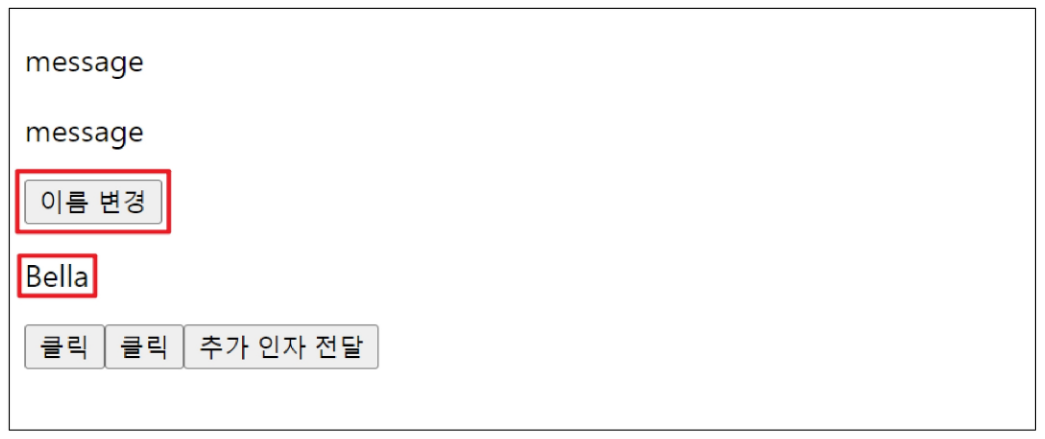

## 참고

### 정적 & 동적 props 주의사항

#### 정적 & 동적 props 주의사항 
- 첫 번째는 정적 props로 문자열 “1”을 전달 

- 두 번째는 동적 props로 숫자 1을 전달 
```html
<!-- 1 --> 
```
```js
<SomeComponent num-props="1" />
``` 
```html
<!-- 2 --> 
```
```js
<SomeComponent :num-props="1" />
```

### Props & Emit 객체 선언 문법

#### Props 선언 시 “객체 선언 문법”을 권장하는 이유 
- 컴포넌트를 가독성이 좋게 문서화하는 데 도움이 되며, 다른 개발자가 잘못된 유형을 전달할 때에 브라우저 콘솔에 경고를 출력하도록 함 

- 추가로 props에 대한 `유효성 검사`로써 활용 가능 
```js
defineProps({ 
    // 여러 타입 허용 
    propB: [String, Number], 
    // 문자열 필수 
    propC: { 
        type: String, 
        required: true 
    }, 
    // 기본 값을 가지는 숫자형 
    propD: { 
        type: Number, 
        default: 10 
    }, 
    ...
```

- https://vuejs.org/guide/components/props.html#prop-validation

#### emit 이벤트도 “객체 선언 문법”으로 작성 가능 
emit 이벤트 또한 객체 구문으로 선언 된 경우 유효성을 검사할 수 있음 
```js
const emit defineEmits({ 
    // 유효성 검사 없음 
    click: null, 
    // submit 이벤트 유효성 검사 
    submit: ({ email, password }) => { 
        if (email && password) { 
            return true 
        } else { 
            console.warn('submit 이벤트가 옳지 않음') 
            return false
        } 
    } 
}) 
const submitForm = function (email, password) { 
    emit('submit', { email, password }) 
} 
```

- https://vuejs.org/guide/components/events.html#events-validation